In [1]:
%matplotlib inline

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
from cycler import cycler


from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

color_cycle = cycler('color',['#377eb8','#4daf4a','#e41a1c','#984ea3','#ff7f00','#a65628','#f781bf','#999999','#ffff33'])
#mpl.rc('figure',figsize=[4,3])
mpl.rc('figure',figsize=[2.7,1.6]) # figure size in inch
mpl.rc('figure',dpi=200) # inline dpi (=display size in browser)
mpl.rc('font',size=8.0)
#mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rc('lines',linewidth=0.7) 
mpl.rc('axes',prop_cycle=color_cycle,grid=True,linewidth=0.5,axisbelow=True,unicode_minus=False)
mpl.rc('grid',linewidth=0.3,linestyle=':')
mpl.rc('legend',fontsize='medium',framealpha=1.0,numpoints=1)
mpl.rc('svg',fonttype='none')
mpl.rc('savefig',dpi=300)
import numpy as np
from numpy import pi

In [11]:
# load the solution
import h5py
from sys import path
path.append('/home/ftoth/cfs/CFS/share/python/') # add path as needed
path.append('/home/hhassanp/Devel/CFS_SRC/CFS/share/python/') # adp path as needed

from hdf5_tools import get_centroids, get_result, get_coordinates, get_step_values

In [40]:
# load comsol results
x,pRe = np.loadtxt('pRe.txt',unpack=True,comments='%')
_,pIm = np.loadtxt('pIm.txt',unpack=True,comments='%')
p = pRe + 1j*pIm

_,uRe = np.loadtxt('uRe.txt',unpack=True,comments='%')
_,uIm = np.loadtxt('uIm.txt',unpack=True,comments='%')
u = uRe + 1j*uIm

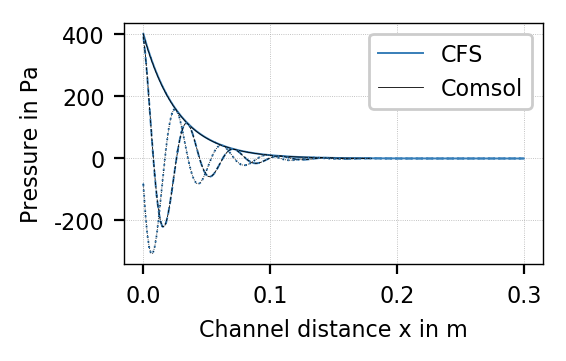

In [42]:
h5 = 'results_hdf5/test.cfs'
Xt = get_coordinates(h5,region='S_flow')
Pt = get_result(h5,'fluidMechPressure',region='S_flow',step='all')
Vt = get_result(h5,'fluidMechVelocity',region='S_flow',step='all')


Itop = np.argwhere(np.abs(Xt[:,1]-0.0005) < 1e-3).ravel()
Is = np.argsort(Xt[Itop,0])
Itop = Itop[Is]

# Pressure Plot
fig,ax = plt.subplots()
l,=ax.plot(Xt[Itop,0],abs(Pt[Itop].T),'-',label='CFS')
b,=ax.plot(x,np.abs(p),'k-',label='Comsol',lw=0.3)

ax.plot(Xt[Itop,0],Pt[Itop].T.real,'--',color=l.get_color())
ax.plot(x,p.real,'--',color=b.get_color(),lw=0.3)

ax.plot(Xt[Itop,0],Pt[Itop].T.imag,':',color=l.get_color())
ax.plot(x,p.imag,':',color=b.get_color(),lw=0.3)



ax.set_ylabel('Pressure in Pa')
ax.set_xlabel('Channel distance x in m')
ax.legend()
#ax.set_xlim(0,0.1)

#velocity Plot
## real part of velocity is zero

fig,ax = plt.subplots()

l,=ax.plot(Xt[Itop,0],abs(Vt[Itop,0].T),'-',label='CFS')
b,=ax.plot(x,np.abs(u),'k-',label='Comsol',lw=0.3)

ax.plot(Xt[Itop,0],Vt[Itop,0].T.real,'--',color=l.get_color())
ax.plot(x,u.real,'--',color=b.get_color(),lw=0.3)

ax.plot(Xt[Itop,0],Vt[Itop,0].T.imag,':',color=l.get_color())
ax.plot(x,u.imag,':',color=b.get_color(),lw=0.3)



ax.set_ylabel('Velocity in m/s')
ax.set_xlabel('Channel distance x in m')
ax.legend()
#ax.set_xlim(0,0.1)